#### Université Paul Sabatier  2018-2019, M2RI https://perso.math.univ-toulouse.fr/m2r/
# Machine learning - TP3 - decoding by linear programming

In [2]:
%matplotlib inline
from matplotlib.pyplot import *
from matplotlib.cm import *
from math import *
from numpy import *
from numpy.random import *
from scipy.misc import *


## Compressed sensing
Given $X \in \mathbb{R}^{n \times d}$ and $y \in \mathbb{R}^n$ such that $y = X\theta_0$ with $\theta_0 \in \mathbb{R}^d$, we have introduced the following estimator for $\theta$ based only on the knowledge of $X$ and $y$.
$$\hat{\theta}_{CS} \in \min_{\theta \in \mathbb{R}^d} \quad \|\theta\|_1 \quad {\rm s.t.}\quad X\theta = y.$$
We have seen in class the following result:
- Given $k \in \mathbb{N}$, $k \leq d$, and $\delta > 0$, assume that $X$ is a Rademacher matrix with $n \geq 2^{11} k^2 \log(1/\delta) + 2^{13} k^2 \log(d)$. Assume furthermore that $\|\theta_0\|_0 \leq k$. Then with probability $1 - \delta$ over the random draw of $X$, the solution $\hat{\theta}_{CS}$ is unique and is equal to $\theta_0$.
The purpose of this exercise is to illustrate this result.

## Linear programming
Given a matrix $A \in \mathbb{R}^{p \times q}$ and vectors $c \in \mathbb{R}^q$, $b \in \mathbb{R}^p$, a linear program (LP) consists of the following optimization problem
$$\min_{y \in \mathbb{R}^q} \quad c^Ty \quad {\rm s.t.}\quad Ay \leq b,$$
where the inequality is understood coordinatewise. There exists general purpose solvers for LPs and [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html) provides one. The following code provides an example of use.

In [3]:
c = [2, 4]
A = [[-1, 0], [0, -1]]
b = [6, 4]
x0_bounds = (None, None)
x1_bounds = (None, None)
from scipy.optimize import linprog
res = linprog(c, A_ub=A, b_ub=b, bounds=(x0_bounds, x1_bounds), options={"disp": True})
print(res)

Optimization terminated successfully.
         Current function value: -28.000000  
         Iterations: 2
     fun: -28.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([-6., -4.])


## $\ell_1$ norm minimization

Express the minimization of the $\ell_1$ norm in $\hat{\theta}_{CS}$ as a linear program. 

Hint: introduce an additional variable $s_i$ for each coordinate, and express the constraint $s_i\geq\theta_i$ and $s_i\geq-\theta$ for $i = 1,\ldots, d$. The minimal such $s$ is the $\ell_1$ norm. Equality constraints can be expressed using inequalities or the `A_eq` argument of `linprog`.

Check your formulation by computing
$$ \min_{y \in \mathbb{R}^2} \|y\|_1 \quad \mathrm{s.t.} \quad 2 y_2 + y_1 = 2$$
the solution is given by $y = (0,1)^T$.

## Solving the compressed sensing LP
Write a function `CS(X,y)` which computes $\hat{\theta}_{CS}$.

In [4]:
def CS(X,y):
    (n,d) = shape(X)
    ## ... fill the function


X = array([[ 1,  1, -1],[ 1, -1, -1]])
theta = [1,0,0]
CS(X,dot(X,theta))
## Should return 
## array([1., 0., 0.])

array([1., 0., 0.])

## Phase transition
The code `X = (rand(2,3) > 1./2) * 2 - 1` gives a Rademacher matrix of size $2 \times 3$.

In [5]:
X = (rand(2,3) > 1./2) * 2 - 1
print(X)

[[-1 -1  1]
 [-1  1  1]]


We fix $d = 20$ and for $k = 1,\ldots,10$, $\theta_k$ denotes the vector which first $k$ entries are $1$ and remaining are $0$. Given $n$ and $k$, $X$ denotes a Rademacher matrix, we would like to estimate the quantity
$$\mathbb{P}\left[\hat{\theta}_{CS} = \theta_k \right]$$
as a function of $k$ and $n$ where the probability is taken with respect to the random draw of $X$. This can be represented using [imshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html). For example:

Text(0,0.5,u'n')

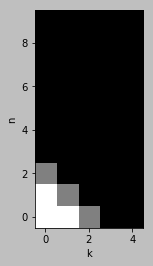

In [6]:
M = zeros((10,5))
M[0,0]=1; M[0,1]=1; M[1,0]=1; M[0,2]=0.5; M[1,1]=0.5; M[2,0]=0.5

style.use('grayscale')

imshow(M,origin = "lower")
xlabel("k")
ylabel("n")

For $n = 1,\ldots,15$, and $k = 0,\ldots, 10$ estimate 
$$\mathbb{P}\left[\hat{\theta}_{CS} = \theta_k \right]$$
as a function of $k$ and $n$ where the probability is taken with respect to the random draw of $X$. This is done by drawing a certain number of realizations of $X$ and computing the success rate. Comment the results in connection with the arguments given in class.

Text(0.5,1,u'Recovery rate (white = 1, black = 0)')

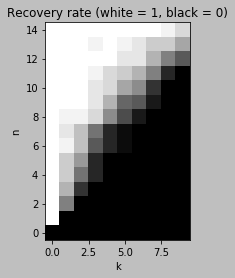